# Quick Example

In this simple demonstration, you will see how to calculate **ZBLMIp** (**Z** score of the corrected **MIp** using **BL**OSUM62 pseudo frequencies)for [Pfam<span class="fa fa-external-link" aria-hidden="true"></span>](http://pfam.xfam.org/) MSA from [Julia REPL](#MIToS-in-the-Julia-REPL) or using a [MIToS script in the system command line](#MIToS-in-system-command-line).

## MIToS in the Julia REPL

If you load the `Pfam` module from `MIToS`, you will get access to a set of functions that work with Pfam MSAs. In this case, we are going to use it for download a [Stockholm <span class="fa fa-external-link" aria-hidden="true"></span>](https://en.wikipedia.org/wiki/Stockholm_format) MSA from the Pfam website and read it into Julia.  

In [1]:
using MIToS.Pfam

In [2]:
pfam_file = downloadpfam("PF10660")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7325  100  7325    0     0   2686      0  0:00:02  0:00:02 --:--:--  2686


"PF10660.stockholm.gz"

In [3]:
msa = read(pfam_file, Stockholm, generatemapping=true, useidcoordinates=true)

175x64 MIToS.MSA.AnnotatedMultipleSequenceAlignment:
 -  -  -  -  -  -  L  L  Q  D  G  V  A  …  L  G  Q  K  V  -  -  -  -  -  -  -
 -  -  -  -  -  -  -  -  -  -  -  -  -     A  Y  K  K  F  F  S  K  G  -  -  -
 -  -  -  -  -  -  -  -  -  -  -  -  -     A  V  R  P  F  L  P  K  K  K  Q  Q
 M  E  S  V  A  R  I  V  K  V  Q  L  P     A  V  R  P  F  L  P  K  K  K  Q  Q
 M  E  S  I  A  R  V  I  K  V  Q  L  P     A  I  R  P  F  L  P  K  K  K  Q  Q
 M  E  S  V  A  R  I  V  K  V  Q  L  P  …  A  V  R  P  F  F  P  K  K  K  Q  Q
 -  -  -  -  -  -  -  -  -  -  -  -  -     A  Y  K  S  L  C  C  K  D  K  C  -
 M  E  S  I  S  K  I  I  K  I  Q  L  P     T  I  R  P  F  L  P  K  K  K  K  Q
 M  E  A  I  A  K  L  I  K  V  Q  L  P     T  Y  K  F  F  Q  P  K  A  -  -  -
 M  N  V  L  Q  S  I  V  R  V  H  I  P     -  -  -  -  -  -  -  -  -  -  -  -
 M  E  P  I  A  H  L  V  K  V  S  V  P  …  S  Y  R  A  F  C  P  R  -  -  -  -
 -  -  -  -  -  -  -  -  -  -  -  -  -     A  Y  K  K  F  M  V  K  E  K  R  -
 -  -  -  -

<div class="panel panel-info">
    <div class="panel-heading">
        <strong>Generation of sequence and column mappings</strong>
    </div>
    <div class="panel-body">
        <p>The keyword argument <code>generatemapping</code> of <code>read</code> allows to generate sequence and column mappings for the MSA. <em>Column mapping</em> is the map between of each column on the MSA object and the column number in the file. <em>Sequence mappings</em> will use the start and end coordinates in the sequence ids for enumerate each residue in the sequence if <code>useidcoordinates</code> is <code>true</code>.</p>
    </div>
</div>

You can plot this MSA and other MIToS’ objects using the [Plots<span class="fa fa-external-link" aria-hidden="true"></span>](https://juliaplots.github.io/) package. The installation of *Plots* is described in the *Installation* section of this site:

[Plots.jl] Initializing backend: pyplot



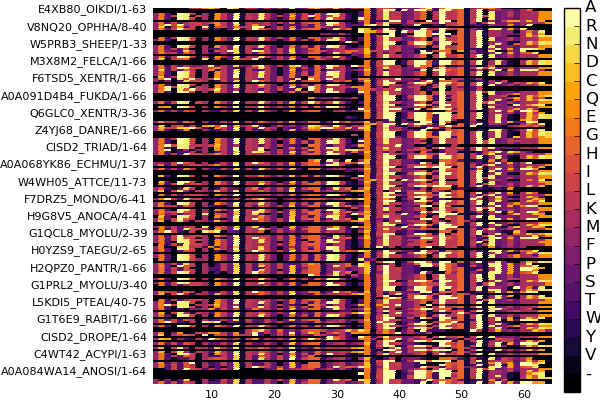

In [4]:
using Plots
plot(msa)

The `Information` module of `MIToS` has functions to calculate measures from the [Information Theory<span class="fa fa-external-link" aria-hidden="true"></span>](https://en.wikipedia.org/wiki/Information_theory), such as Entropy and Mutual Information (MI), on a MSA. In this example, we will estimate covariation between columns of the MSA with a corrected **MI** that use the **BL**OSUM62 matrix for calculate pseudo frequencies (`BLMI`).  

In [5]:
using MIToS.Information

In [6]:
ZBLMIp, BLMIp = BLMI(msa)

ZBLMIp # shows ZBLMIp scores

63x63 PairwiseListMatrices.PairwiseListMatrix{Float64,false}:
 NaN            2.46511    …   -1.32919    -1.19693     -0.697059
   2.46511    NaN              -1.23216     0.897799     0.960125
  -0.0923402    2.40178        -0.27604     2.24876      0.425557
   0.905596    -0.148058       -0.630232   -0.174719    -1.96283 
   0.453618     2.16523        -4.02084    -1.40993     -3.20961 
  -1.10929     -1.22913    …    2.44097     1.42962     -1.30241 
   0.114829     1.55534        -0.197      -1.24763     -0.618266
   0.980493    -0.0431943      -1.06381    -3.30738     -1.54429 
   2.00953      1.23394        -2.05024     2.49769      0.69274 
  -0.26462     -1.19885         0.822037   -0.0320149    0.991519
  -0.466452     1.33284    …   -1.6166      2.24381     -0.580879
   1.53805      1.73564         1.80493     2.37913      0.312555
   2.20232     -0.280613       -3.05766    -2.97641     -2.08704 
   ⋮                       ⋱    ⋮                                
  -1.41737    

Once the *Plots* package is installed and loaded, you can use its capabilities to visualize this results:


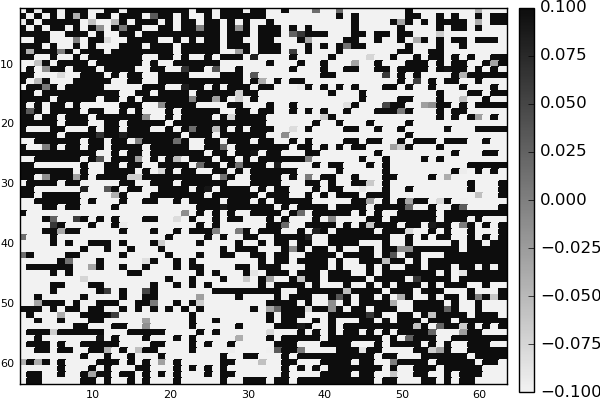

In [7]:
heatmap(ZBLMIp, yflip=true, c=:grays)

## MIToS in system command line

Calculate ZBLMIp on the system shell is easy using the MIToS script called `BLMI.jl`. This script reads a MSA file, and writes a file with the same base name of the input but with the `.BLMI.csv` extension.   

In [7]:
;BLMI.jl -f PF14972.stockholm.gz

In [8]:
;head -20 PF14972.stockholm.BLMI.csv

# MIToS 0.1.1+ BLMI.jl 2016-02-26T02:21:07
# used arguments:
# 	list		nothing
# 	format		stockholm
# 	threshold		0.62
# 	apc		true
# 	maxgap		0.5
# 	samples		50
# 	file		PF14972.stockholm.gz
# 	fixedgaps		true
# 	beta		8.512
i,j,ZBLMIp,BLMIp
1,2,-.7004979287302624,-.10773158935175786
1,3,-1.2705630050564432,-.14636730384499808
1,4,.011154688282294722,-.004889231952564216
1,5,-.2676871957834277,-.03250207598779911
1,6,.7673531754724379,.041348234477362855
1,7,-1.2539399615584093,-.14679683902400162
1,8,.10805836461787835,-.022688091751868172
1,9,-.46031183144933563,-.05100794737701467


<div class="panel panel-info">
    <div class="panel-heading">
        <strong>Julia shell mode</strong>
    </div>
    <div class="panel-body">
        <p>A semicolon (<code>;</code>) next to Julia prompt, at the beginning of the line, enters the shell mode. This mode uses the system shell to execute system commands.</p>
    </div>
</div>